In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import time
import cv2
import os

### COLLECTING DATASETS

In [2]:
# Path for exported data, numpy arrays
CNN_PATH = os.path.join('FSL_ALPHABETS_KEYPOINTS') 
# CNN_PATH = os.path.join('PIC3/dataset_abc3') 
# Actions that we try to detect
action_labels = np.array(['a', 'b', 'c', 'd','e', 'f', 'g', 'h', 'i','k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u','v','w', 'x', 'y'])
datas = ['a', 'b', 'c', 'd','e', 'f', 'g', 'h', 'i','k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u','v','w', 'x', 'y']
# Thirty videos worth of data
no_sequences = 30 #number of sequences

# Videos are going to be 30 frames in length
sequence_length = 60

In [4]:
for data in datas:
    for action in action_labels: 
            try: 
                os.makedirs(os.path.join(CNN_PATH, data, action))
            except:
                pass

In [8]:
cap = cv2.VideoCapture(0 + cv2.CAP_DSHOW)

for action in action_labels:
    for sequence in range(no_sequences):
            for frame_num in range(sequence_length):

                ret, frame = cap.read()
                
                if not ret:
                    continue
                                        
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,247), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 216), 1, cv2.LINE_AA)
                    cv2.imshow('FSL DATASET COLLECTION', image)
                    img_name = os.path.join(CNN_PATH, action, str(sequence), "{}.png".format(frame_num))
                    cv2.imwrite(img_name, frame)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 216), 1, cv2.LINE_AA)
                    cv2.imshow('FSL DATASET COLLECTION', image)
                    img_name = os.path.join(CNN_PATH, action, str(sequence), "{}.png".format(frame_num))
                    cv2.imwrite(img_name, frame)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [9]:
cap.read()

(False, None)

In [9]:
cap.release()
cv2.destroyAllWindows()

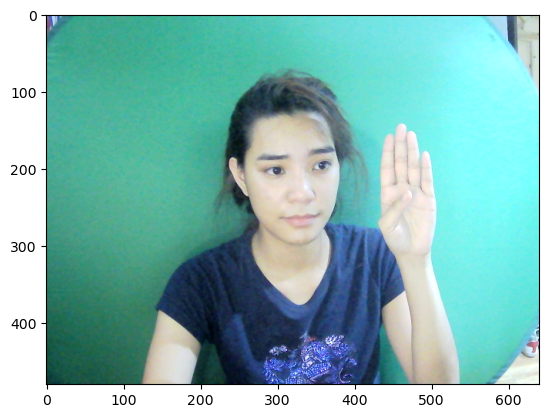

In [3]:
img = image.load_img('FSL_ALPHABETS_KEYPOINTS/b/1/26.png')
plt.imshow(img)

In [4]:
cv2.imread('CNN_DATASET/train/a/0/0.png').shape

(480, 640, 3)

In [5]:
print(cv2.imread('CNN_DATASET/train/a/0/0.png'))

[[[166 212  96]
  [166 212  96]
  [167 213  95]
  ...
  [133 125  95]
  [131 125  97]
  [133 127  99]]

 [[165 213  97]
  [166 214  98]
  [167 215  97]
  ...
  [134 124  94]
  [133 125  95]
  [134 126  96]]

 [[163 213  95]
  [165 215  97]
  [163 217  96]
  ...
  [133 122  95]
  [135 124  97]
  [137 126  99]]

 ...

 [[ 78 107  26]
  [ 79 108  27]
  [ 75 109  27]
  ...
  [202 228 225]
  [201 227 222]
  [202 228 223]]

 [[ 80 108  25]
  [ 80 108  25]
  [ 79 108  27]
  ...
  [205 228 225]
  [204 228 221]
  [204 228 221]]

 [[ 80 108  25]
  [ 81 109  26]
  [ 82 110  27]
  ...
  [205 228 225]
  [205 229 222]
  [204 228 221]]]


In [6]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('FSL_ALPHABETS_KEYPOINTS/',
                                           target_size=(400,400),
                                           batch_size=9,
                                           class_mode = "categorical")

validation_dataset = train.flow_from_directory('FSL_ALPHABETS_KEYPOINTS/',
                                           target_size=(400,400),
                                           batch_size=9,
                                           class_mode = "categorical")

Found 105600 images belonging to 24 classes.
Found 105600 images belonging to 24 classes.


In [8]:
train_dataset.class_indices

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'k': 9,
 'l': 10,
 'm': 11,
 'n': 12,
 'o': 13,
 'p': 14,
 'q': 15,
 'r': 16,
 's': 17,
 't': 18,
 'u': 19,
 'v': 20,
 'w': 21,
 'x': 22,
 'y': 23}

In [9]:
train_dataset.classes

array([ 0,  0,  0, ..., 23, 23, 23])

### DATA PREPROCESSING

In [10]:
# train_datagen = ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)

# training_set = train_datagen.flow_from_directory('dataset/training_set',
#                                                  target_size = (64, 64),
#                                                  batch_size = 32,
#                                                  class_mode = 'binary')

### Preprocessing the Test set

In [11]:
# test_datagen = ImageDataGenerator(rescale = 1./255)
# test_set = test_datagen.flow_from_directory('dataset/test_set',
#                                             target_size = (64, 64),
#                                             batch_size = 32,
#                                             class_mode = 'binary')

### Building the CNN

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #It allows us to build sequential neural network
from tensorflow.keras.layers import Conv2D, MaxPool2D,Conv2D,Flatten, Dense, Dropout #LSTM - temporal component for neural network, Dense- normal fully connected layer
from tensorflow.keras.callbacks import TensorBoard # logging inside tensorboard

In [13]:
cnn = Sequential()

In [14]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(400,400,3))) #Convolution
cnn.add(MaxPool2D(pool_size=2, strides=2)) #Pooling
cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu')) #second convolutional layer
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten()) #Flattening
cnn.add(Dense(units=128, activation='relu')) #Full Connection
cnn.add(Dense(units=64, activation='relu')) #Full Connection
cnn.add(Dense(units=24, activation='softmax'))  #Output layer

### Training the CNN

In [15]:
cnn.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

In [16]:
log_dir = os.path.join('FSL_CNN_LOGS0')
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=0, write_graph=True, write_images=True)

In [ ]:
cnn.fit(x = train_dataset, validation_data = validation_dataset, epochs = 1500, callbacks=[tb_callback])

Epoch 1/1500
  174/11734 [..............................] - ETA: 3:39:46 - loss: 2.9620 - categorical_accuracy: 0.2375

### Making a single prediction

In [33]:
# mport os

# path = r"my/path/to/file.txt"
# assert os.path.isfile(path)
# with open(path, "r") as f:
#     pass

dir_path = 'CNN_DATASET/test/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+f"{i}.png", target_size=(400,400))
    plt.imshow()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis = 0)
    images = np.vstack([X])
    
    val = model.predict(images)
    
    if val == 0:
        print('A')
    elif val == 1:
        print('B')
    else:
        print('C')

PermissionError: [Errno 13] Permission denied: 'CNN_DATASET/test//a'